In [1]:
import sys
sys.path.insert(0, "../../python")

from propagation import laser
from ionization import ionization
from ionization import adk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
from scipy import integrate
from scipy.optimize import curve_fit

In [7]:
Eplot = np.load('electricField.npy')
nplot = np.load('ionizationFrac.npy')

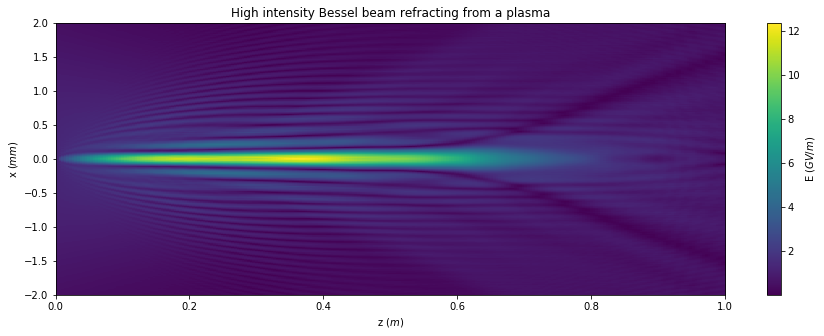

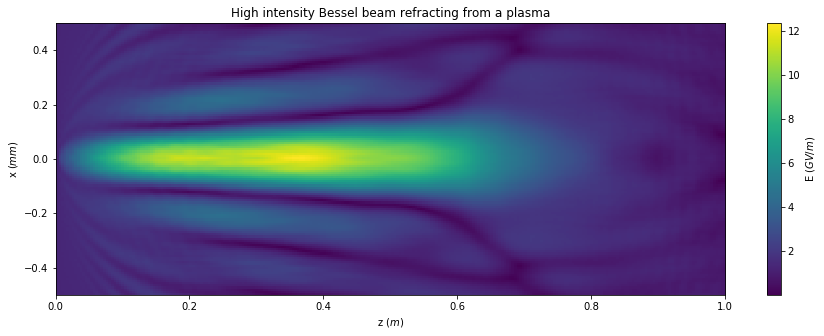

In [9]:
ind = 63
Z = 1e6
X = 8000

plt.figure(figsize=(15, 5))
plt.imshow(np.flipud(np.transpose(Eplot[ind, :, :])), aspect='auto', extent=[0, Z/1e6, -X/2e3, X/2e3])
cb = plt.colorbar()
cb.set_label(r'E ($GV/m$)')
plt.set_cmap('viridis')
plt.xlabel(r'z ($m$)')
plt.ylabel(r'x ($mm$)')
plt.title('High intensity Bessel beam refracting from a plasma')
plt.xlim([0, Z/1e6])
plt.ylim([-2, 2])
plt.show()

plt.figure(figsize=(15, 5))
plt.imshow(np.flipud(np.transpose(Eplot[ind, :, :])), aspect='auto', extent=[0, Z/1e6, -X/2e3, X/2e3])
cb = plt.colorbar()
cb.set_label(r'E ($GV/m$)')
plt.xlabel(r'z ($m$)')
plt.ylabel(r'x ($mm$)')
plt.title('High intensity Bessel beam refracting from a plasma')
plt.xlim([0, Z/1e6])
plt.ylim([-0.5, 0.5])
plt.show()

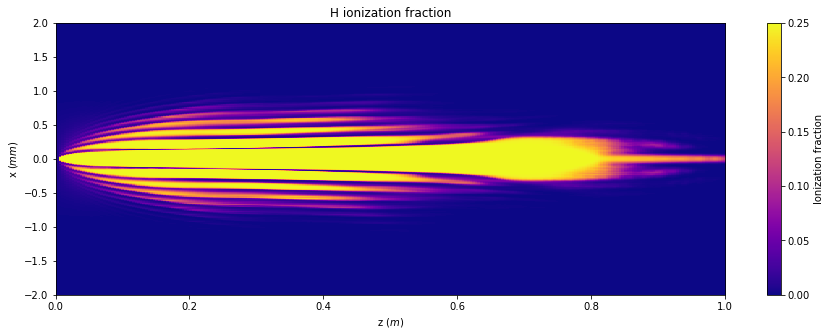

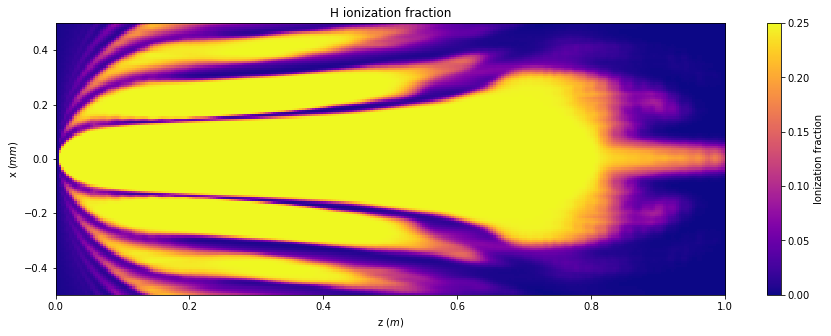

In [10]:
ind = 63

plt.figure(figsize=(15, 5))
plt.imshow(np.flipud(nplot[ind, :, :]), aspect='auto', extent=[0, Z/1e6, -X/2e3, X/2e3,])
cb = plt.colorbar()
cb.set_label(r'Ionization fraction')
plt.set_cmap('plasma')
plt.xlabel(r'z ($m$)')
plt.ylabel(r'x ($mm$)')
plt.title('H ionization fraction')
plt.xlim([0, Z/1e6])
plt.ylim([-2, 2])
plt.show()

plt.figure(figsize=(15, 5))
plt.imshow(np.flipud(nplot[ind, :, :]), aspect='auto', extent=[0, Z/1e6, -X/2e3, X/2e3])
cb = plt.colorbar()
cb.set_label(r'Ionization fraction')
plt.xlabel(r'z ($m$)')
plt.ylabel(r'x ($mm$)')
plt.title('H ionization fraction')
plt.xlim([0, Z/1e6])
plt.ylim([-0.5, 0.5])
plt.show()

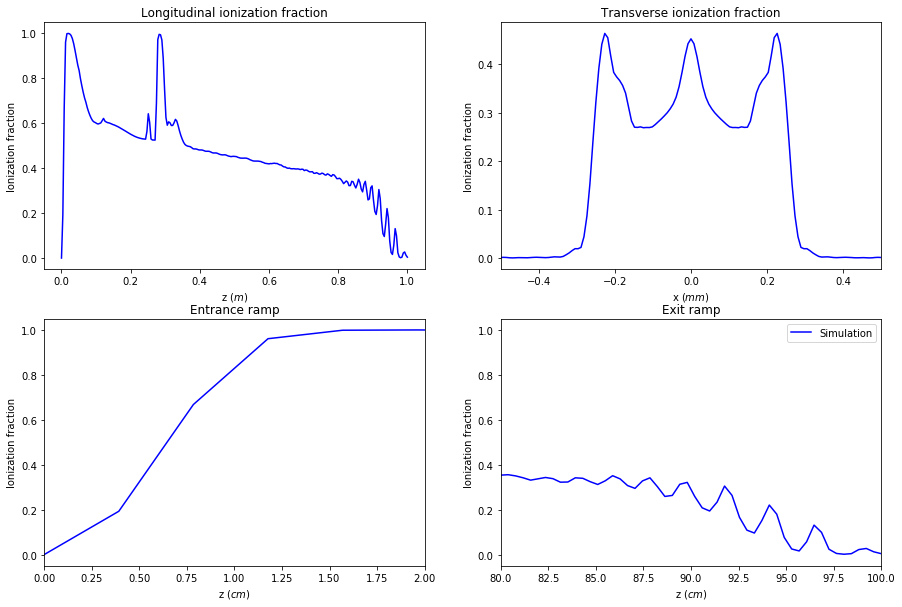

In [107]:
ind=23
Nx = 2**10
X = 8000
x = np.linspace(-X/2, X/2, Nx, False)
Nz = 2**8
Z = 1e6
z = np.linspace(0, Z, Nz)
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.plot(z/1e6, nplot[ind, int(Nx/2), :], 'b-')
plt.xlabel(r'z ($m$)')
plt.ylabel(r'Ionization fraction')
plt.title('Longitudinal ionization fraction')
#plt.xlim([0.1, 1.0])

plt.subplot(222)
plt.plot(x/1e3, nplot[ind, :, int(Nz/2)], 'b-')
plt.xlabel(r'x ($mm$)')
plt.ylabel(r'Ionization fraction')
plt.title('Transverse ionization fraction')
plt.xlim([-0.5, 0.5])

plt.subplot(223)
plt.plot(z/1e4, nplot[ind, int(Nx/2)], 'b-')
plt.xlabel(r'z ($cm$)')
plt.ylabel(r'Ionization fraction')
plt.title('Entrance ramp')
plt.xlim([0., 2.])

plt.subplot(224)
plt.plot(z/1e4, nplot[ind, int(Nx/2)], 'b-')
plt.xlabel(r'z ($cm$)')
plt.ylabel(r'Ionization fraction')
plt.title('Exit ramp')
plt.xlim([80, 100])
plt.legend(['Simulation', 'Sigmoid', 'Gaussian'])
plt.show()

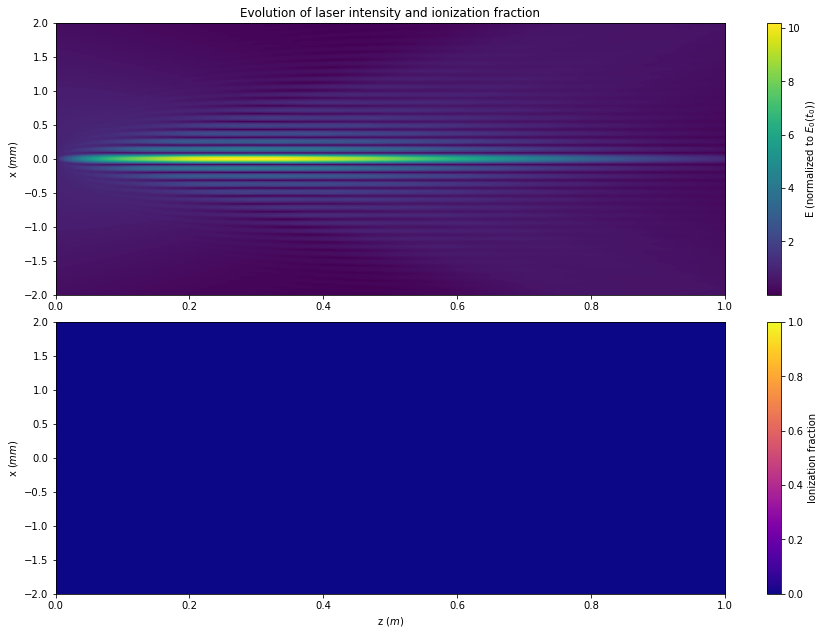

In [48]:
# Time lattice must match Plasma_Refraction
Nt = 2**8
T = 100
t = np.linspace(-T/2, T/2, Nt, False)
tau = 35
lam = 0.8
f = 0.3/lam
omega = 2*np.pi*f
Et = ionization.gaussian_envelope(0.2, t, tau).real

Evideo = Eplot / np.reshape(Et, (Nt, 1, 1))
# Create the figure
fig = plt.figure(figsize=(15, 10.5))
plt.subplots_adjust(hspace=0.1)
# Setup the intensity plot
plt.subplot(211)
im1 = plt.imshow(np.flipud(np.transpose(Evideo[0, :, :])), aspect='auto', animated=True, extent=[0, Z/1e6, -X/2e3, X/2e3])
cb1 = plt.colorbar()
cb1.set_label(r'E (normalized to $E_0(t_0)$)')
#plt.xlabel(r'z ($m$)')
plt.ylabel(r'x ($mm$)')
plt.title(r'Evolution of laser intensity and ionization fraction')
plt.xlim([0, Z/1e6])
plt.ylim([-2, 2])
# Setup the ionization fraction plot
plt.subplot(212)
im2 = plt.imshow(np.flipud(nplot[0, :, :]), aspect='auto', animated=True, clim=(0.0, 1.0), extent=[0, Z/1e6, -X/2e3, X/2e3])
cb2 = plt.colorbar()
im2.set_cmap('plasma')
cb2.set_label(r'Ionization fraction')
plt.xlabel(r'z ($m$)')
plt.ylabel(r'x ($mm$)')
plt.xlim([0, Z/1e6])
plt.ylim([-2, 2])

i = 1;

def updatefig(*args):
    global i
    im1.set_array(np.flipud(np.transpose(Evideo[i, :, :])))
    im2.set_array(np.flipud(nplot[i, :, :]))
    i += 1
    if i==Nt:
        i=0
    return im,

ani = animation.FuncAnimation(fig, updatefig, blit=True, frames=Nt)
ani.save(r'C:\Users\robert\Dropbox\Research\temp\Plasma_Density.mp4', fps=20)
plt.show()